<a href="https://colab.research.google.com/github/AshilPrasad/Machine-learning/blob/main/clustering_KMeans(mall_customer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import numpy as np
import pandas as pd
df=pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df=df.drop('CustomerID',axis=1)
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Genre"]=le.fit_transform(df["Genre"])
df


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df)
x=scaler.fit_transform(df)
x

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918],
       [0.        , 0.07692308, 0.01639344, 0.76530612],
       [0.        , 0.32692308, 0.02459016, 0.05102041],
       [0.        , 0.09615385, 0.02459016, 0.94897959],
       [1.        , 0.88461538, 0.03278689, 0.02040816],
       [0.        , 0.23076923, 0.03278689, 0.7244898 ],
       [1.        , 0.94230769, 0.03278689, 0.13265306],
       [0.        , 0.32692308, 0.03278689, 1.        ],
       [0.        , 0.76923077, 0.04098361, 0.14285714],
       [0.        , 0.11538462, 0.04098361, 0.7755102 ],
       [1.        , 0.36538462, 0.04098361, 0.12244898],
       [1.        , 0.07692308, 0.04098361, 0.79591837],
       [0.        , 0.32692308, 0.04918033, 0.34693878],
       [1.        , 0.03846154,

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11): #i is clusters
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [ ]:
print(wcss)

[86.68148216035944, 37.27227241211876, 29.552857611943857, 22.39096001192855, 19.081722486105583, 16.413737030973795, 14.24674254985116, 12.24791327983111, 10.60024563671109, 9.392393333765716]


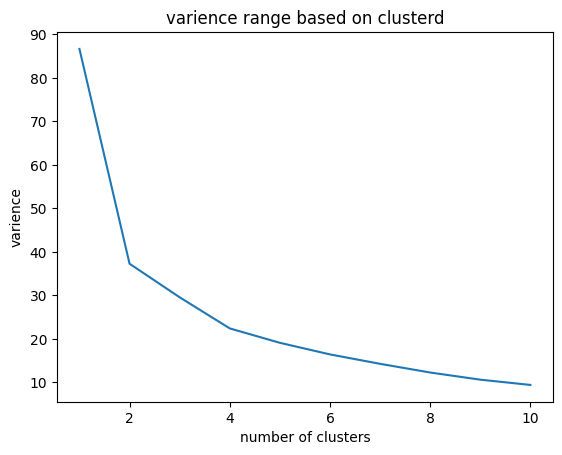

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('number of clusters')
plt.ylabel('varience')
plt.title('varience range based on clusterd')
plt.plot(range(1,11),wcss)
plt.show()


In [ ]:
#number of clusters=6
kmeans=KMeans(n_clusters=6,init='k-means++',random_state=42)
y_pred=kmeans.fit_predict(x)
y_pred

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 1, 2, 3, 0, 2, 0, 3, 2, 3, 0,
       1, 0, 1, 0, 1, 0, 1, 2, 3, 2, 3, 0, 1, 2, 1, 2, 1, 2, 1, 0, 3, 2,
       1, 2, 1, 2, 2, 2, 1, 0, 2, 3, 1, 3, 1, 3, 2, 3, 3, 0, 1, 1, 3, 0,
       1, 1, 0, 2, 3, 1, 1, 1, 3, 0, 1, 3, 2, 1, 3, 0, 3, 1, 2, 3, 1, 2,
       2, 1, 1, 0, 3, 1, 2, 0, 1, 2, 3, 0, 2, 1, 3, 0, 3, 2, 1, 3, 3, 3,
       3, 2, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 2, 5, 3, 0, 3, 0, 4, 0,
       2, 5, 4, 5, 1, 0, 4, 5, 1, 0, 2, 5, 4, 0, 3, 5, 1, 0, 4, 0, 1, 5,
       1, 5, 4, 5, 4, 5, 1, 5, 4, 5, 3, 5, 4, 5, 1, 0, 4, 0, 4, 0, 1, 5,
       3, 0, 3, 0, 1, 5, 4, 5, 1, 0, 1, 0, 1, 5, 1, 5, 4, 5, 1, 5, 1, 0,
       4, 0], dtype=int32)

In [ ]:
from re import X
#to add output to input
df['cluster']=y_pred
df

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,2
3,0,23,16,77,2
4,0,31,17,40,2
...,...,...,...,...,...
195,0,35,120,79,5
196,0,45,126,28,1
197,1,32,126,74,0
198,1,32,137,18,4


In [ ]:
x1=df.iloc[:,:-1].values
x1

array([[  1,  19,  15,  39],
       [  1,  21,  15,  81],
       [  0,  20,  16,   6],
       [  0,  23,  16,  77],
       [  0,  31,  17,  40],
       [  0,  22,  17,  76],
       [  0,  35,  18,   6],
       [  0,  23,  18,  94],
       [  1,  64,  19,   3],
       [  0,  30,  19,  72],
       [  1,  67,  19,  14],
       [  0,  35,  19,  99],
       [  0,  58,  20,  15],
       [  0,  24,  20,  77],
       [  1,  37,  20,  13],
       [  1,  22,  20,  79],
       [  0,  35,  21,  35],
       [  1,  20,  21,  66],
       [  1,  52,  23,  29],
       [  0,  35,  23,  98],
       [  1,  35,  24,  35],
       [  1,  25,  24,  73],
       [  0,  46,  25,   5],
       [  1,  31,  25,  73],
       [  0,  54,  28,  14],
       [  1,  29,  28,  82],
       [  0,  45,  28,  32],
       [  1,  35,  28,  61],
       [  0,  40,  29,  31],
       [  0,  23,  29,  87],
       [  1,  60,  30,   4],
       [  0,  21,  30,  73],
       [  1,  53,  33,   4],
       [  1,  18,  33,  92],
       [  0,  

In [ ]:
y1=df.iloc[:,-1].values
y1

array([0, 0, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 1, 2, 3, 0, 2, 0, 3, 2, 3, 0,
       1, 0, 1, 0, 1, 0, 1, 2, 3, 2, 3, 0, 1, 2, 1, 2, 1, 2, 1, 0, 3, 2,
       1, 2, 1, 2, 2, 2, 1, 0, 2, 3, 1, 3, 1, 3, 2, 3, 3, 0, 1, 1, 3, 0,
       1, 1, 0, 2, 3, 1, 1, 1, 3, 0, 1, 3, 2, 1, 3, 0, 3, 1, 2, 3, 1, 2,
       2, 1, 1, 0, 3, 1, 2, 0, 1, 2, 3, 0, 2, 1, 3, 0, 3, 2, 1, 3, 3, 3,
       3, 2, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 2, 5, 3, 0, 3, 0, 4, 0,
       2, 5, 4, 5, 1, 0, 4, 5, 1, 0, 2, 5, 4, 0, 3, 5, 1, 0, 4, 0, 1, 5,
       1, 5, 4, 5, 4, 5, 1, 5, 4, 5, 3, 5, 4, 5, 1, 0, 4, 0, 4, 0, 1, 5,
       3, 0, 3, 0, 1, 5, 4, 5, 1, 0, 1, 0, 1, 5, 1, 5, 4, 5, 1, 5, 1, 0,
       4, 0], dtype=int32)

In [ ]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test= train_test_split(x1,y1,test_size=0.30,random_state=42)
x1_train

array([[  1,  32,  87,  63],
       [  0,  27,  60,  50],
       [  0,  21,  30,  73],
       [  0,  58,  20,  15],
       [  0,  21,  33,  81],
       [  0,  50,  67,  57],
       [  1,  48,  39,  36],
       [  0,  36, 103,  85],
       [  0,  68,  59,  55],
       [  0,  44,  73,   7],
       [  1,  33,  42,  60],
       [  1,  40,  71,  95],
       [  1,  19,  81,   5],
       [  1,  24,  38,  92],
       [  0,  51,  67,  43],
       [  1,  19,  64,  46],
       [  0,  45,  28,  32],
       [  0,  35,  74,  72],
       [  0,  23,  62,  41],
       [  0,  19,  63,  54],
       [  0,  20,  16,   6],
       [  1,  40,  54,  48],
       [  0,  50,  40,  55],
       [  1,  28, 101,  68],
       [  0,  32, 103,  69],
       [  1,  48,  54,  46],
       [  0,  29,  79,  83],
       [  0,  42,  34,  17],
       [  0,  34, 103,  23],
       [  1,  19,  46,  55],
       [  0,  46,  25,   5],
       [  1,  32,  75,  93],
       [  0,  49,  62,  48],
       [  1,  18,  33,  92],
       [  0,  

In [ ]:
x1_test

array([[  1,  24,  60,  52],
       [  1,  22,  20,  79],
       [  1,  60,  30,   4],
       [  1,  34,  78,   1],
       [  1,  59,  71,  11],
       [  0,  19,  65,  50],
       [  0,  32,  48,  47],
       [  1,  40,  87,  13],
       [  0,  52,  88,  13],
       [  0,  24,  39,  65],
       [  0,  43,  48,  50],
       [  1,  46,  98,  15],
       [  0,  36,  85,  75],
       [  0,  23,  54,  52],
       [  0,  54, 101,  24],
       [  1,  27,  88,  69],
       [  0,  51,  44,  50],
       [  0,  44,  78,  20],
       [  1,  67,  54,  41],
       [  1,  19,  48,  59],
       [  0,  23,  70,  29],
       [  0,  35,  21,  35],
       [  0,  34,  78,  22],
       [  0,  40,  60,  40],
       [  1,  18,  48,  59],
       [  1,  70,  46,  56],
       [  0,  21,  54,  57],
       [  0,  68,  48,  48],
       [  0,  31,  70,  77],
       [  0,  25,  72,  34],
       [  0,  30,  19,  72],
       [  1,  52,  23,  29],
       [  1,  47,  43,  41],
       [  1,  26,  54,  54],
       [  1,  

In [ ]:
y1_train

array([0, 2, 2, 1, 2, 1, 3, 5, 1, 1, 0, 0, 4, 0, 1, 0, 1, 5, 2, 2, 2, 3,
       1, 0, 5, 3, 5, 1, 1, 0, 1, 0, 1, 0, 2, 1, 5, 1, 0, 0, 2, 3, 2, 0,
       3, 4, 3, 1, 1, 3, 4, 0, 4, 5, 3, 0, 3, 1, 5, 1, 1, 3, 5, 4, 0, 0,
       1, 5, 0, 2, 1, 2, 2, 1, 2, 4, 2, 2, 3, 5, 1, 3, 0, 2, 3, 1, 2, 3,
       0, 1, 3, 5, 1, 3, 2, 3, 0, 0, 0, 1, 5, 4, 5, 5, 1, 1, 3, 1, 1, 2,
       2, 2, 0, 3, 1, 4, 0, 2, 5, 5, 0, 2, 0, 4, 0, 0, 0, 1, 2, 3, 1, 0,
       3, 1, 1, 1, 3, 3, 0, 3], dtype=int32)

In [ ]:
y1_test

array([0, 0, 3, 4, 3, 2, 2, 4, 1, 2, 1, 4, 5, 2, 1, 0, 1, 1, 3, 0, 2, 2,
       1, 1, 0, 3, 2, 1, 5, 2, 2, 3, 3, 0, 4, 3, 5, 0, 3, 1, 1, 0, 1, 1,
       1, 5, 2, 2, 5, 1, 2, 0, 2, 3, 1, 1, 1, 3, 4, 1], dtype=int32)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x1_train)
x1_train=scaler.fit_transform(x1_train)
x1_test=scaler.fit_transform(x1_test)
x1_train


array([[1.        , 0.26923077, 0.59016393, 0.63265306],
       [0.        , 0.17307692, 0.36885246, 0.5       ],
       [0.        , 0.05769231, 0.12295082, 0.73469388],
       [0.        , 0.76923077, 0.04098361, 0.14285714],
       [0.        , 0.05769231, 0.14754098, 0.81632653],
       [0.        , 0.61538462, 0.42622951, 0.57142857],
       [1.        , 0.57692308, 0.19672131, 0.35714286],
       [0.        , 0.34615385, 0.72131148, 0.85714286],
       [0.        , 0.96153846, 0.36065574, 0.55102041],
       [0.        , 0.5       , 0.47540984, 0.06122449],
       [1.        , 0.28846154, 0.22131148, 0.60204082],
       [1.        , 0.42307692, 0.45901639, 0.95918367],
       [1.        , 0.01923077, 0.54098361, 0.04081633],
       [1.        , 0.11538462, 0.18852459, 0.92857143],
       [0.        , 0.63461538, 0.42622951, 0.42857143],
       [1.        , 0.01923077, 0.40163934, 0.45918367],
       [0.        , 0.51923077, 0.10655738, 0.31632653],
       [0.        , 0.32692308,

In [ ]:
x1_test

array([[1.        , 0.11538462, 0.39449541, 0.5257732 ],
       [1.        , 0.07692308, 0.02752294, 0.80412371],
       [1.        , 0.80769231, 0.11926606, 0.03092784],
       [1.        , 0.30769231, 0.55963303, 0.        ],
       [1.        , 0.78846154, 0.49541284, 0.10309278],
       [0.        , 0.01923077, 0.44036697, 0.50515464],
       [0.        , 0.26923077, 0.28440367, 0.4742268 ],
       [1.        , 0.42307692, 0.64220183, 0.12371134],
       [0.        , 0.65384615, 0.65137615, 0.12371134],
       [0.        , 0.11538462, 0.20183486, 0.65979381],
       [0.        , 0.48076923, 0.28440367, 0.50515464],
       [1.        , 0.53846154, 0.74311927, 0.1443299 ],
       [0.        , 0.34615385, 0.62385321, 0.7628866 ],
       [0.        , 0.09615385, 0.33944954, 0.5257732 ],
       [0.        , 0.69230769, 0.7706422 , 0.2371134 ],
       [1.        , 0.17307692, 0.65137615, 0.70103093],
       [0.        , 0.63461538, 0.24770642, 0.50515464],
       [0.        , 0.5       ,

In [ ]:
#model creation using naive bayes algorithm
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x1_train,y1_train)
y_pred=model.predict(x1_test)
y_pred

array([0, 0, 3, 4, 3, 2, 2, 4, 1, 2, 1, 4, 5, 2, 1, 0, 1, 1, 3, 0, 2, 1,
       1, 1, 0, 3, 2, 1, 5, 2, 2, 3, 3, 0, 4, 3, 5, 0, 3, 1, 1, 0, 1, 1,
       1, 5, 2, 2, 5, 1, 2, 0, 2, 3, 1, 1, 1, 3, 4, 1], dtype=int32)

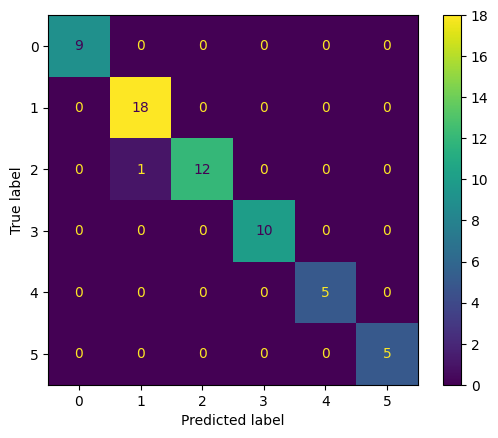

In [ ]:
#performence evaluation
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report
con=confusion_matrix(y1_test,y_pred)
score=accuracy_score(y1_test,y_pred)
report=classification_report(y1_test,y_pred)
label=[0,1,2,3,4,5]
cmd=ConfusionMatrixDisplay(con,display_labels=label)
cmd.plot()

In [ ]:
con

array([[ 9,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0],
       [ 0,  1, 12,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  5]])

In [ ]:
score

0.9833333333333333

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60

